In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Visualizing date-time data with UFOs!

In [2]:
# Read in the dataset
ufo = pd.read_csv('../data/ufo2.csv')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'sightings'],
      dtype='object')

In [3]:
# Read in the dataset
ufo = pd.read_csv(Path.joinpath(Path.cwd().parent, 'data', 'ufo2.csv'))
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'sightings'],
      dtype='object')

In [5]:
# Check out the time variable
ufo['Time'].describe()

count                   80543
unique                  68901
top       2014-07-04 22:00:00
freq                       45
Name: Time, dtype: object

In [6]:
# What type of var is it?
ufo['Time'].dtype

dtype('O')

In [7]:
# convert a string to the datetime format
ufo['Time'] = pd.to_datetime(ufo['Time'], infer_datetime_format=True)
ufo['Time'].dtype # Now it's dt format

dtype('<M8[ns]')

In [8]:
# create new variables!
ufo['Date'] = ufo['Time'].dt.date
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,sightings,Date
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1,1930-06-01
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1,1930-06-30
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1,1931-02-15
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1,1931-06-01
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1,1933-04-18


In [9]:
# Create some additional variables
ufo['Year']=ufo['Time'].dt.year 
ufo['Month']=ufo['Time'].dt.month 
ufo['Day']=ufo['Time'].dt.day 
ufo['Hour']=ufo['Time'].dt.hour 
ufo['Weekday']=ufo['Time'].dt.weekday 
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,sightings,Date,Year,Month,Day,Hour,Weekday
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1,1930-06-01,1930,6,1,22,6
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1,1930-06-30,1930,6,30,20,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1,1931-02-15,1931,2,15,14,6
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1,1931-06-01,1931,6,1,13,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1,1933-04-18,1933,4,18,19,1


In [10]:
# also allows you to do datetime "math"
(ufo.Time.max() - ufo.Time.min()).days  

30776

## Creating a categorical variable with proper sorting

In [11]:
# Create a weekday variable using map and numeration
ufo['weekday_name']=ufo['Weekday'].map({0:'Sunday',
                                       1: 'Monday',
                                       2: 'Tuesday',
                                       3: 'Wednesday',
                                       4: 'Thursday',
                                       5: 'Friday',
                                       6: 'Saturday'})
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,sightings,Date,Year,Month,Day,Hour,Weekday,weekday_name
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1,1930-06-01,1930,6,1,22,6,Saturday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1,1930-06-30,1930,6,30,20,0,Sunday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1,1931-02-15,1931,2,15,14,6,Saturday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1,1931-06-01,1931,6,1,13,0,Sunday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1,1933-04-18,1933,4,18,19,1,Monday


In [12]:
# note that this creates an "object" type variable
ufo['weekday_name'].dtypes

dtype('O')

In [13]:
# but the problem with this is that it doesn't display in the right order.
ufo['weekday_name'].value_counts()

Friday       14245
Thursday     11759
Saturday     11709
Wednesday    11032
Tuesday      10976
Monday       10783
Sunday       10039
Name: weekday_name, dtype: int64

In [14]:
# this lack of order also affects your `groupby` sorting.
daycounts = ufo.groupby(['weekday_name'])[['weekday_name']].count().sort_index(ascending=True)
daycounts

,weekday_name
weekday_name,
Friday,14245
Monday,10783
Saturday,11709
Sunday,10039
Thursday,11759
Tuesday,10976
Wednesday,11032


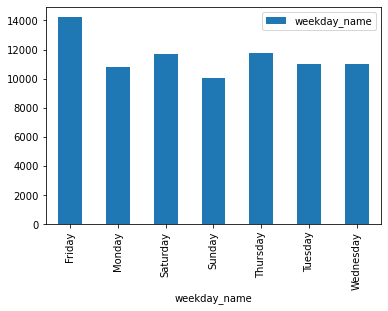

In [15]:
# and it screws up the ordering in your visualizations.
daycounts.plot(kind='bar');

In [16]:
# the solution is to create a new var with dtype 'category'
ufo['weekday_cats']=pd.Series(ufo['Weekday'].map({0:'Sunday',
                                       1: 'Monday',
                                       2: 'Tuesday',
                                       3: 'Wednesday',
                                       4: 'Thursday',
                                       5: 'Friday',
                                       6: 'Saturday'})
                              , dtype='category') # this is the money line
ufo['weekday_cats'].dtypes

CategoricalDtype(categories=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
                  'Tuesday', 'Wednesday'],
, ordered=False)

In [17]:
# you also have to set the category order as a list
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
ufo['weekday_cats'] = ufo['weekday_cats'].cat.set_categories(day_order, ordered=True)

In [18]:
# now the days will appear in the proper order!
ufo['weekday_cats'].value_counts(ascending=True)

Sunday       10039
Monday       10783
Tuesday      10976
Wednesday    11032
Saturday     11709
Thursday     11759
Friday       14245
Name: weekday_cats, dtype: int64

In [19]:
# this will also transfer to groupby statements
daycounts = ufo.groupby(['weekday_cats'])[['weekday_cats']].count().sort_index()
daycounts

,weekday_cats
weekday_cats,
Sunday,10039
Monday,10783
Tuesday,10976
Wednesday,11032
Thursday,11759
Friday,14245
Saturday,11709


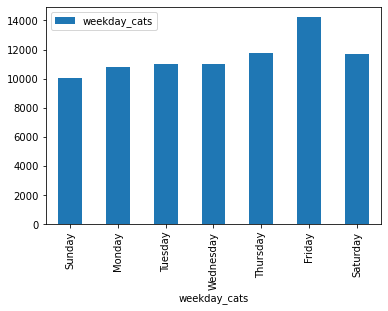

In [20]:
# and this sort order will also transfer to your visualizations
daycounts.plot(kind='bar');

## Plotting line charts with time series data

In [21]:
# which dates were the most frequent ufo sightings?
ufo['Date'].value_counts(ascending=False).head(5)

2014-07-04    258
2010-07-04    202
2012-07-04    188
1999-11-16    187
2013-07-04    177
Name: Date, dtype: int64

In [22]:
# # Set the Time variable as the dataframe index (This will make plotting timelines easier)
# ufo['Time2']=ufo['Time']
# ufo=ufo.set_index('Time2')

In [23]:
# Create a variable to count the number of sightings by date
# ufo['sightings']=1
# dates = ufo.groupby('Date')['sightings'].sum()
# ufo = ufo.drop('sightings', axis=1)
# dates.sort_values(ascending=False).head()

In [24]:
# Create a new dataframe of sightings
# dates_df = pd.DataFrame(dates)
# dates_df= dates_df.reset_index()
# dates_df.sort_values('sightings', ascending=False).head()

In [25]:
# Merge the daily number of sightings back into the original datafram
# ufo2 = pd.merge(ufo, dates_df, on='Date', how='left')
# ufo2.to_csv('../data/ufo2.csv')

In [26]:
# what's the average number of sightings on a given day?
ufo['sightings'].mean()

18.735296673826404

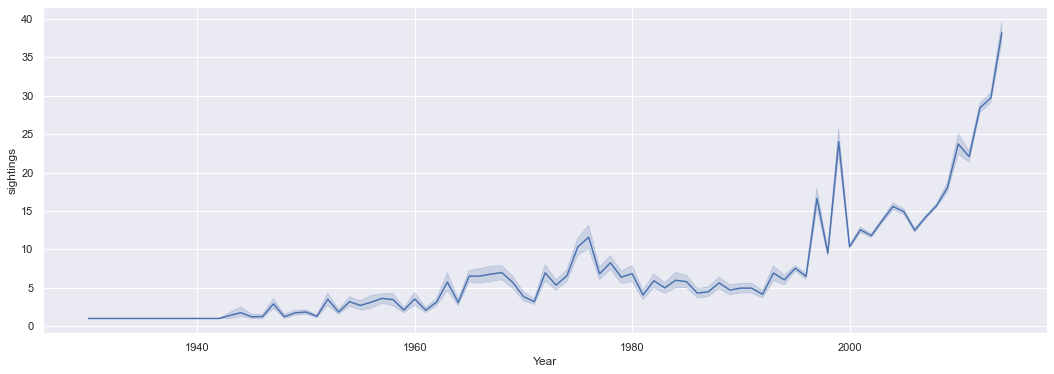

In [27]:
# Trend over years
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x='Year', y='sightings', data=ufo);

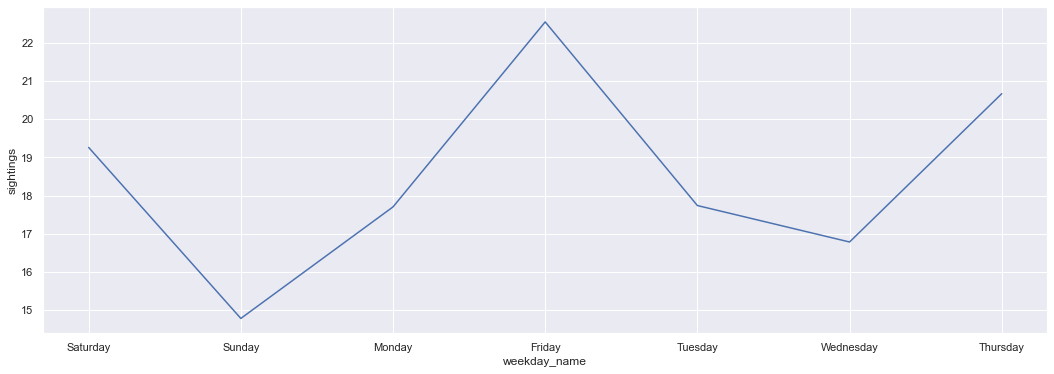

In [28]:
# Trend over weekday

sns.lineplot(x='weekday_name', y='sightings', data=ufo, ci=None);

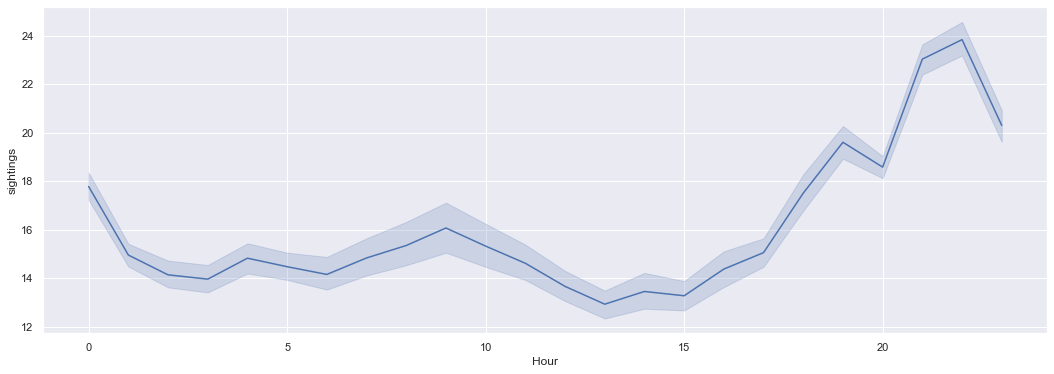

In [29]:
# Trend over time of day

sns.lineplot(x='Hour', y='sightings', data=ufo);

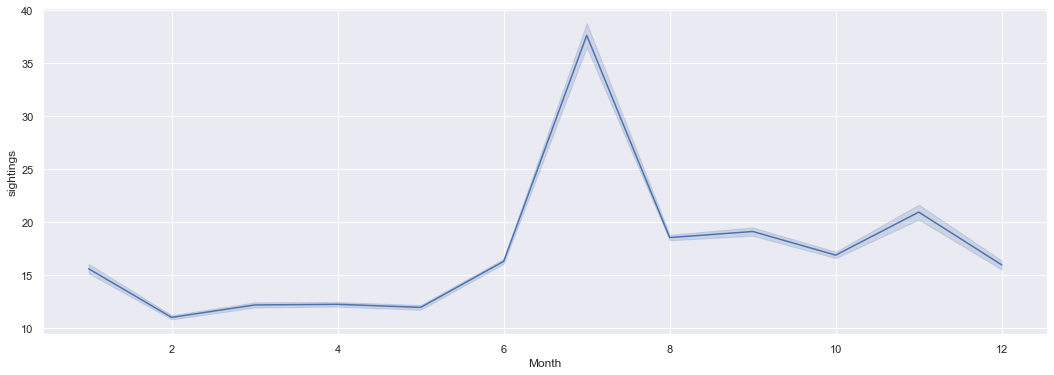

In [30]:
# Trend over month

sns.lineplot(x='Month', y='sightings', data=ufo);

## Plot multiple lines in color

In [31]:
# First, let's shorten the number of color categories. There are too many!
print(ufo['Colors Reported'].value_counts().head(15))

ORANGE            5216
RED               4809
GREEN             1897
BLUE              1855
YELLOW             842
RED ORANGE         486
RED GREEN          469
RED BLUE           445
RED GREEN BLUE     166
GREEN BLUE         147
RED YELLOW         146
ORANGE YELLOW      137
ORANGE GREEN        66
ORANGE BLUE         58
YELLOW GREEN        53
Name: Colors Reported, dtype: int64


In [32]:
# we can create a new variable with only 4 categories.
ufo['color']='other'
ufo.loc[ufo['Colors Reported']=='ORANGE', 'color']='orange'
ufo.loc[ufo['Colors Reported']=='RED', 'color']='red'
ufo.loc[ufo['Colors Reported']=='GREEN', 'color']='green'
ufo['color'].value_counts()

other     68621
orange     5216
red        4809
green      1897
Name: color, dtype: int64

In [33]:
# Alternative: we can create new columns for specific colors using numpy. This is called "one-hot encoding".
ufo['orange']=np.where(ufo['Colors Reported']=='ORANGE', 1, 0)
ufo['red']=np.where(ufo['Colors Reported']=='RED', 1, 0)
ufo['green']=np.where(ufo['Colors Reported']=='GREEN', 1, 0)
ufo['other_color']=np.where(ufo['orange']+ufo['red']+ufo['green']==0, 1, 0)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,sightings,Date,Year,Month,Day,Hour,Weekday,weekday_name,weekday_cats,color,orange,red,green,other_color
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1,1930-06-01,1930,6,1,22,6,Saturday,Saturday,other,0,0,0,1
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1,1930-06-30,1930,6,30,20,0,Sunday,Sunday,other,0,0,0,1
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1,1931-02-15,1931,2,15,14,6,Saturday,Saturday,other,0,0,0,1
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1,1931-06-01,1931,6,1,13,0,Sunday,Sunday,other,0,0,0,1
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1,1933-04-18,1933,4,18,19,1,Monday,Monday,other,0,0,0,1


In [34]:
# Create a new dataset by collapsing the original dataframe on color and date
ufo['sighting']=1
dates = ufo.groupby(['Year', 'color'])['sighting'].sum()
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.head()
dates_df[dates_df['Year']==2009]

,Year,color,sighting
245,2009,green,82
246,2009,orange,220
247,2009,other,3689
248,2009,red,260


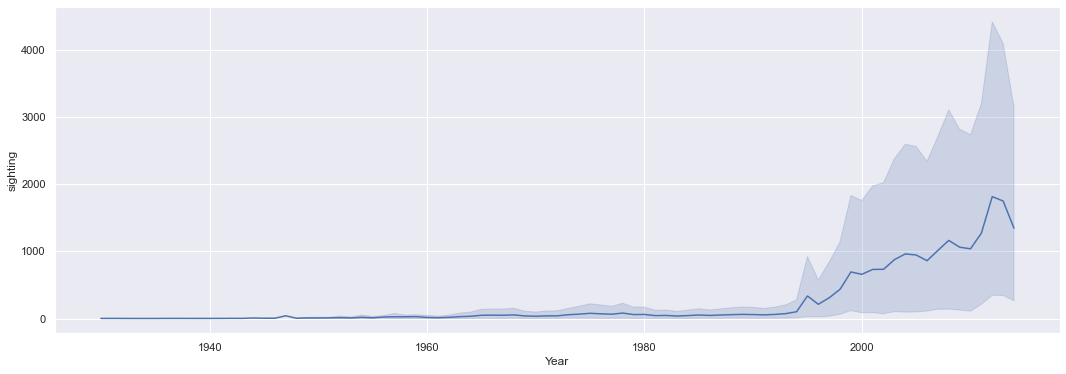

In [35]:
# Plot the lines
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x="Year", y="sighting", data=dates_df);

In [36]:
# Restrict the dataset to only the last 20 years (this makes the chart a lot easier to read)
dates_df2=dates_df.loc[(dates_df['Year']>2000) & (dates_df['Year']<2015) & (dates_df['color']!='other')]

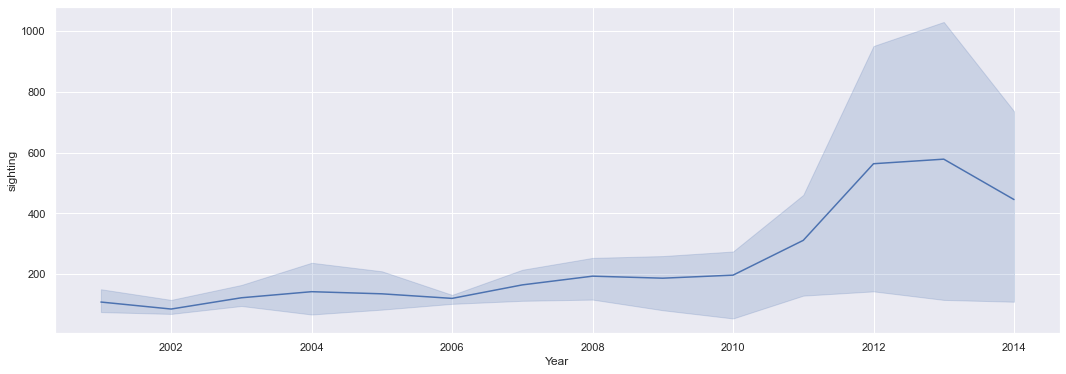

In [37]:
# Now plot the lines for this shorter time period
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x="Year", y="sighting", data=dates_df2);

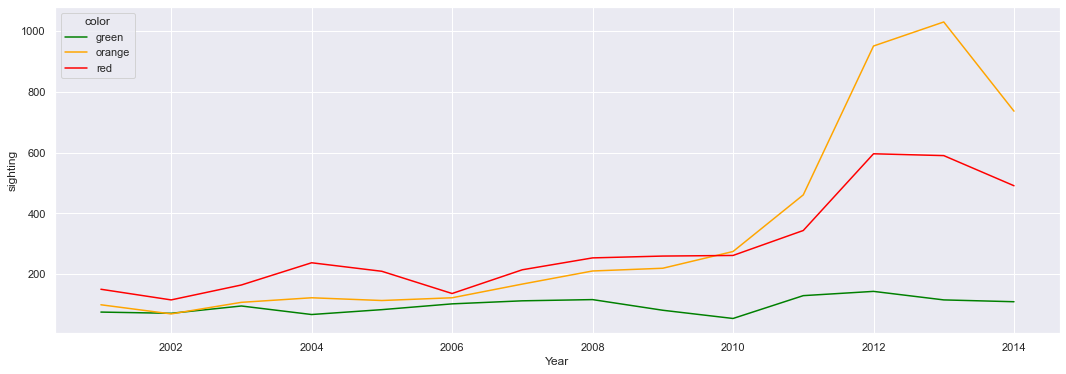

In [38]:
# Plot the lines in color!!
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x="Year", y="sighting", hue="color", palette=['green', 'orange', 'red'], data=dates_df2);

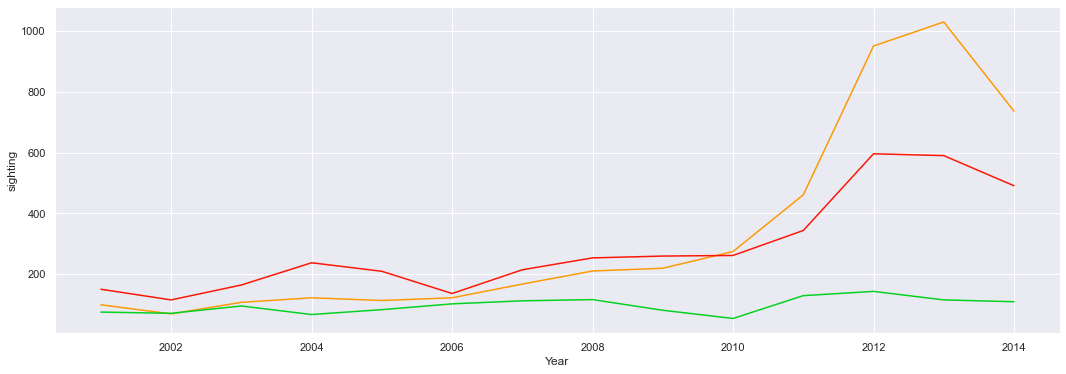

In [39]:
# you can also do this with a for-loop, using 3 filters, one for each color and use hex codes.
for (colorchoice, linechoice) in [('#FD9903','orange'), ('#04D221','green'), ('#FD1604', 'red') ]:
    sns.lineplot(x="Year", y="sighting", color=colorchoice, data=dates_df2[dates_df2['color']==linechoice]);

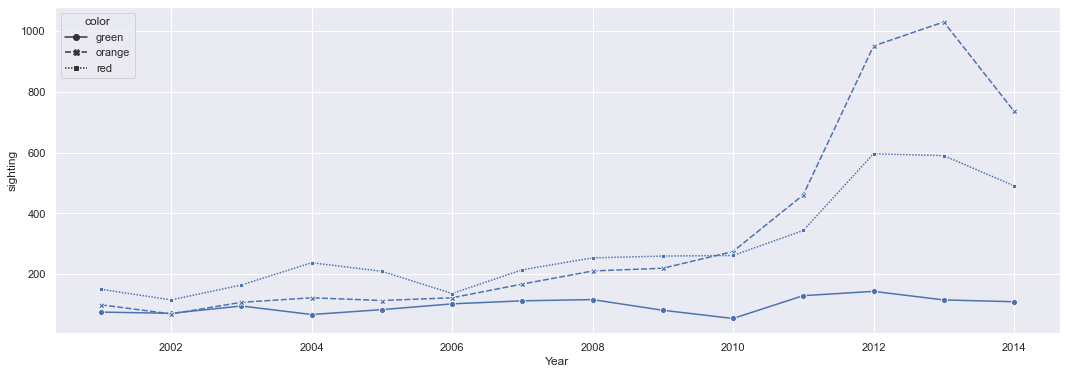

In [40]:
# an alternative is to use "style" instead of "hue".
sns.lineplot(x="Year", y="sighting", data=dates_df2, style='color', markers=True, dashes=True);